In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

data = pd.read_csv('data_london/processed_data/listing_data_clean_final_v2_extra.csv')

pd.set_option('display.max_columns', None)

col_to_drop = ['latitude','longitude','host_total_listings_count','property_type','room_type',
              'number_of_reviews','reviews_per_month','host_is_superhost']

data.drop(columns=col_to_drop, inplace=True)

data.head(3)
data.shape

(57636, 46)

In [2]:
# one hot encoding
# do not drop one dummy variable
data = pd.get_dummies(data, drop_first=False)
data.shape

(57636, 77)

In [3]:
col_to_drop_2 = ['property_room_type_Others_Entire home/apt','property_room_type_Others_Hotel room',
                 'property_room_type_Others_Private room','property_room_type_Others_Shared room']

data.drop(columns=col_to_drop_2, inplace=True)
data.head(3)

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,region_Central,region_East,region_North,region_South,region_West,property_room_type_Apartment_Entire home/apt,property_room_type_Apartment_Hotel room,property_room_type_Apartment_Private room,property_room_type_Apartment_Shared room,property_room_type_Bungalow_Entire home/apt,property_room_type_Bungalow_Private room,property_room_type_Bungalow_Shared room,property_room_type_Guesthouse_Entire home/apt,property_room_type_Guesthouse_Hotel room,property_room_type_Guesthouse_Private room,property_room_type_Guesthouse_Shared room,property_room_type_Hotel_Entire home/apt,property_room_type_Hotel_Hotel room,property_room_type_Hotel_Private room,property_room_type_Hotel_Shared room
0,0.8,0.88,1,1,1,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,1,29,6,0,0,0,1,2,0,3831.0,3556.0,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.86,1,1,1,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,10,50,4,1,1,1,1,0,0,3812.0,3796.0,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.8,0.95,1,1,0,6,2.0,3.0,3.0,300.0,350.0,90.0,3,10.0,3,365,2,1,0,0,15,0,0,3781.0,3340.0,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data['rating_class'] = data['rating_class'].apply(np.int64)
data['rating_class'].value_counts()

2    50118
1     5434
0     2084
Name: rating_class, dtype: int64

In [5]:
# rearrange columns
df = data[[ col for col in data.columns if col != 'rating_class'] + ['rating_class']]
df.head(3)

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,region_Central,region_East,region_North,region_South,region_West,property_room_type_Apartment_Entire home/apt,property_room_type_Apartment_Hotel room,property_room_type_Apartment_Private room,property_room_type_Apartment_Shared room,property_room_type_Bungalow_Entire home/apt,property_room_type_Bungalow_Private room,property_room_type_Bungalow_Shared room,property_room_type_Guesthouse_Entire home/apt,property_room_type_Guesthouse_Hotel room,property_room_type_Guesthouse_Private room,property_room_type_Guesthouse_Shared room,property_room_type_Hotel_Entire home/apt,property_room_type_Hotel_Hotel room,property_room_type_Hotel_Private room,property_room_type_Hotel_Shared room,rating_class
0,0.8,0.88,1,1,1,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,1,29,6,0,0,0,1,2,0,3831.0,3556.0,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
1,1.0,0.86,1,1,1,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,10,50,4,1,1,1,1,0,0,3812.0,3796.0,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0.8,0.95,1,1,0,6,2.0,3.0,3.0,300.0,350.0,90.0,3,10.0,3,365,2,1,0,0,15,0,0,3781.0,3340.0,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


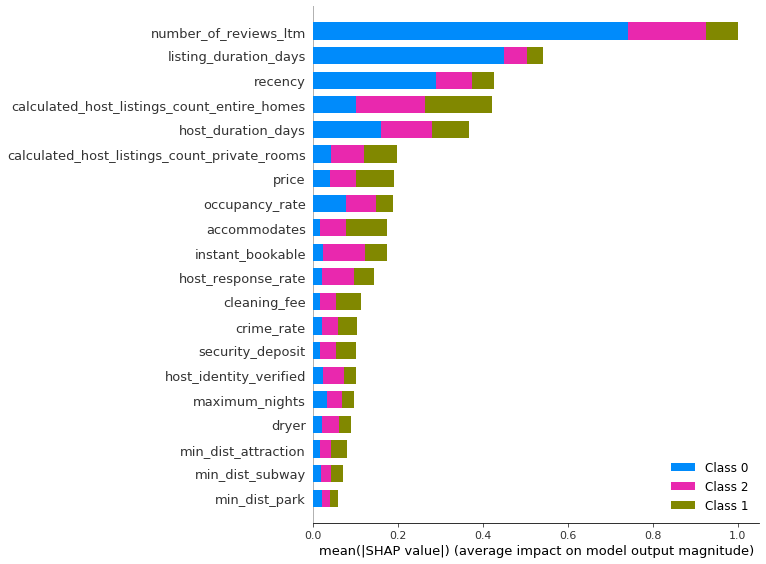

In [11]:
import shap
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, metrics
from xgboost import XGBClassifier

shap.initjs()

x = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(int)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 888)

xgb = XGBClassifier(objective='multi:softprob',eval_metric='mlogloss',
                    subsample=0.8861, n_estimators=100, min_child_weight=0.6325, 
                    max_depth=7, colsample_bytree=0.9413, learning_rate=0.08724,
                    gamma=0.5, random_state=42)

mymodel = xgb.fit(x_train, y_train)
mybooster = mymodel.get_booster()

model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun

# Shap explainer initilization
shap_values = shap.TreeExplainer(mybooster).shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")

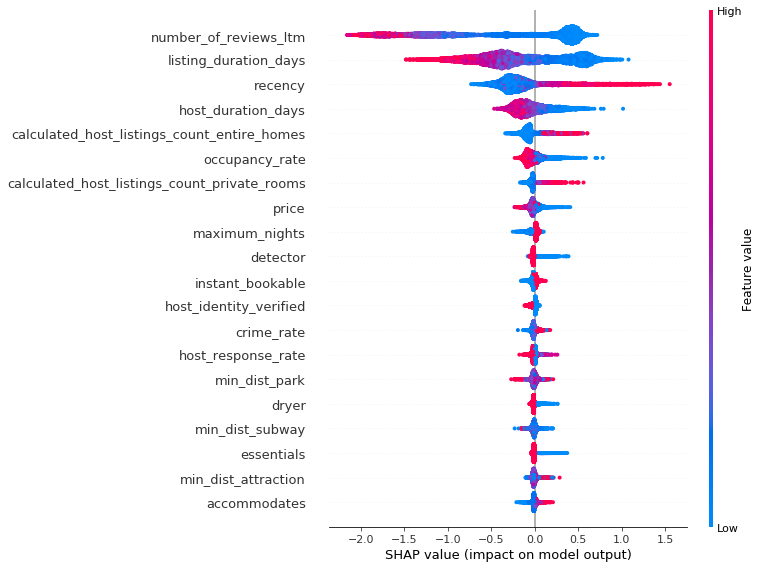

In [7]:
xgb_shap_values = shap.TreeExplainer(mybooster).shap_values(x_test)

#class 0
shap.summary_plot(xgb_shap_values[0], x_test)
#f.savefig("./summary_plot1.png", bbox_inches='tight', dpi=600)

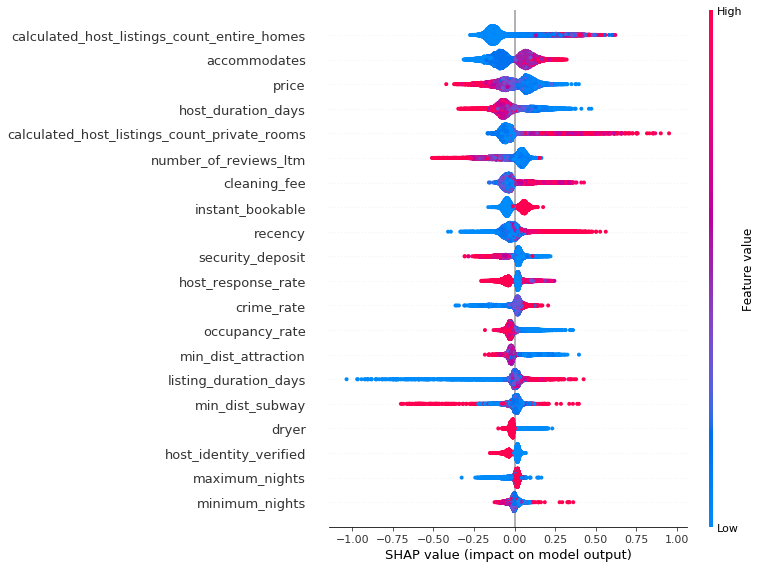

In [8]:
# class 1
shap.summary_plot(xgb_shap_values[1], x_test)

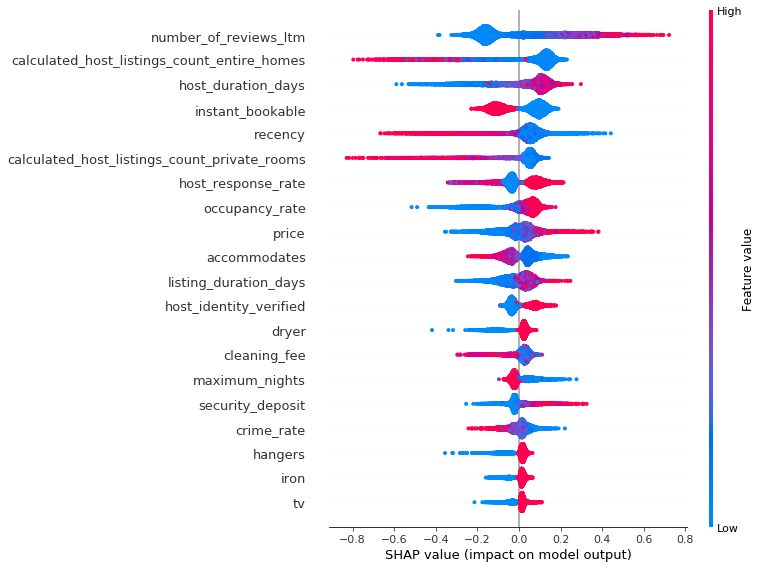

In [9]:
# class 2
shap.summary_plot(xgb_shap_values[2], x_test)

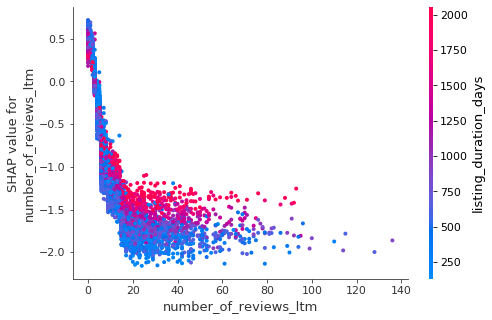

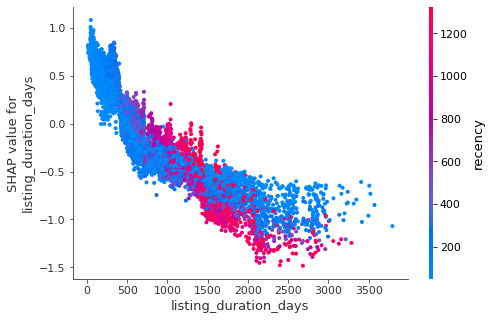

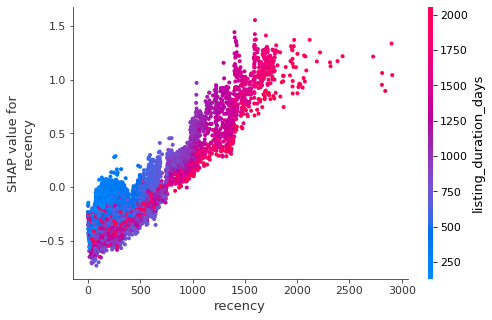

In [10]:
# class 0 - dependence plot
shap.dependence_plot('number_of_reviews_ltm', shap_values[0], x_test)
shap.dependence_plot('listing_duration_days', shap_values[0], x_test)
shap.dependence_plot('recency', shap_values[0], x_test)

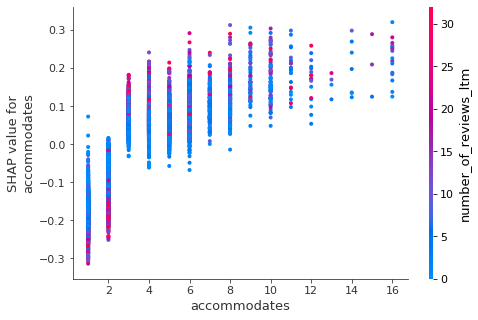

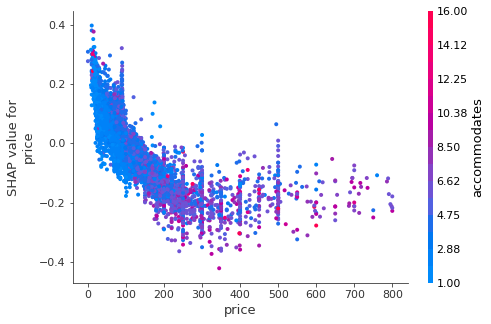

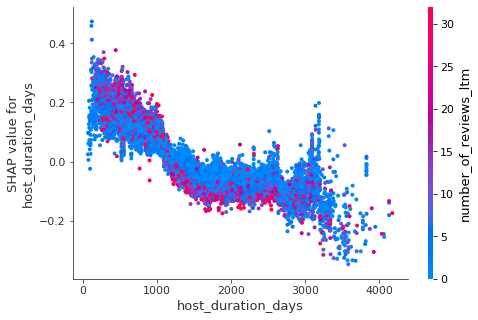

In [11]:
# class 1 - dependence plot
shap.dependence_plot('accommodates', shap_values[1], x_test)
shap.dependence_plot('price', shap_values[1], x_test)
shap.dependence_plot('host_duration_days', shap_values[1], x_test)

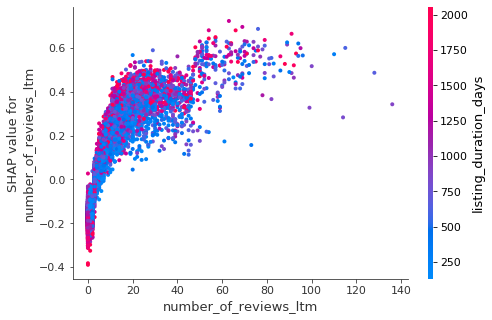

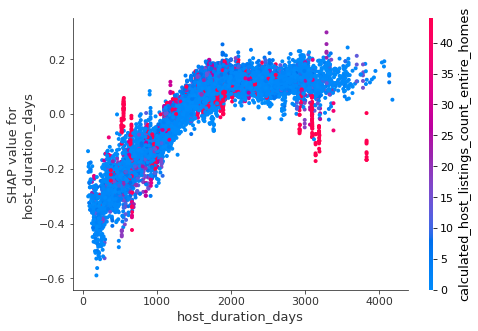

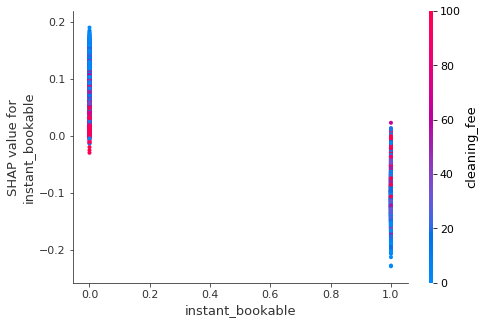

In [12]:
# class 2 - dependence plot
shap.dependence_plot('number_of_reviews_ltm', shap_values[2], x_test)
shap.dependence_plot('host_duration_days', shap_values[2], x_test)
shap.dependence_plot('instant_bookable', shap_values[2], x_test)